# Eksplorasi Data

In [5]:
#Import libraries
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
from sklearn.preprocessing import OneHotEncoder

In [6]:
sportscar = pd.read_csv("sportscar_choice_long.csv")
sportscar

,resp_id,ques,alt,segment,seat,trans,convert,price,choice
0,1,1,1,basic,2,manual,yes,35,0
1,1,1,2,basic,5,auto,no,40,0
2,1,1,3,basic,5,auto,no,30,1
3,1,2,1,basic,5,manual,no,35,0
4,1,2,2,basic,2,manual,no,30,1
...,...,...,...,...,...,...,...,...,...
5995,200,9,2,fun,2,auto,yes,35,0
5996,200,9,3,fun,4,manual,no,30,0
5997,200,10,1,fun,4,auto,yes,40,0
5998,200,10,2,fun,4,auto,no,30,1


In [8]:
sportscar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   resp_id  6000 non-null   int64 
 1   ques     6000 non-null   int64 
 2   alt      6000 non-null   int64 
 3   segment  6000 non-null   object
 4   seat     6000 non-null   int64 
 5   trans    6000 non-null   object
 6   convert  6000 non-null   object
 7   price    6000 non-null   int64 
 8   choice   6000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 422.0+ KB


In [9]:
sportscar.resp_id.nunique()

200

In [10]:
sportscar.ques.nunique()

10

In [11]:
sportscar.alt.nunique()

3

In [12]:
sportscar.choice.value_counts()

0    4000
1    2000
Name: choice, dtype: int64

## Level dan Atribut

In [13]:
sportscar.describe(include="all")

,resp_id,ques,alt,segment,seat,trans,convert,price,choice
count,6000.000000,6000.000000,6000.000000,6000,6000.000000,6000,6000,6000.000000,6000.000000
unique,NaN,NaN,NaN,3,NaN,2,2,NaN,NaN
top,NaN,NaN,NaN,basic,NaN,auto,yes,NaN,NaN
freq,NaN,NaN,NaN,3840,NaN,3001,3012,NaN,NaN
mean,100.500000,5.500000,2.000000,NaN,3.659167,NaN,NaN,34.977500,0.333333
std,57.739117,2.872521,0.816565,NaN,1.247501,NaN,NaN,4.077143,0.471444
min,1.000000,1.000000,1.000000,NaN,2.000000,NaN,NaN,30.000000,0.000000
25%,50.750000,3.000000,1.000000,NaN,2.000000,NaN,NaN,30.000000,0.000000
50%,100.500000,5.500000,2.000000,NaN,4.000000,NaN,NaN,35.000000,0.000000
75%,150.250000,8.000000,3.000000,NaN,5.000000,NaN,NaN,40.000000,1.000000


In [14]:
sportscar.segment.value_counts()

basic    3840
fun      1530
racer     630
Name: segment, dtype: int64

In [15]:
sportscar.seat.value_counts()

2    2013
4    2006
5    1981
Name: seat, dtype: int64

In [16]:
sportscar.trans.value_counts()

auto      3001
manual    2999
Name: trans, dtype: int64

In [17]:
sportscar.convert.value_counts()

yes    3012
no     2988
Name: convert, dtype: int64

In [18]:
sportscar.price.value_counts()

35    2011
30    2008
40    1981
Name: price, dtype: int64

In [19]:
chosen_by_trans = pd.crosstab(sportscar.choice, sportscar.trans)
chosen_by_segment = pd.crosstab(sportscar.choice, sportscar.segment)
chosen_by_seat = pd.crosstab(sportscar.choice, sportscar.seat)
chosen_by_convert = pd.crosstab(sportscar.choice, sportscar.convert)
chosen_by_price = pd.crosstab(sportscar.choice, sportscar.price)

In [20]:
chosen_by_trans

trans,auto,manual
choice,,
0,1673,2327
1,1328,672


In [21]:
chosen_by_segment

segment,basic,fun,racer
choice,,,
0,2560,1020,420
1,1280,510,210


In [22]:
chosen_by_seat

seat,2,4,5
choice,,,
0,1405,1390,1205
1,608,616,776


In [23]:
chosen_by_convert

convert,no,yes
choice,,
0,2047,1953
1,941,1059


In [24]:
chosen_by_price

price,30,35,40
choice,,,
0,998,1345,1657
1,1010,666,324


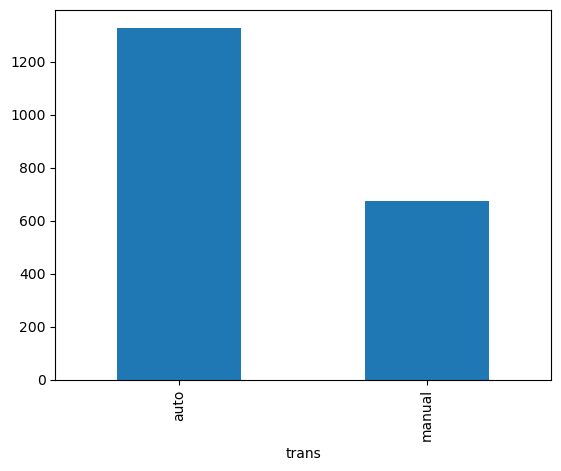

In [25]:
chosen_by_trans.loc[1].plot(kind="bar")
plt.show()

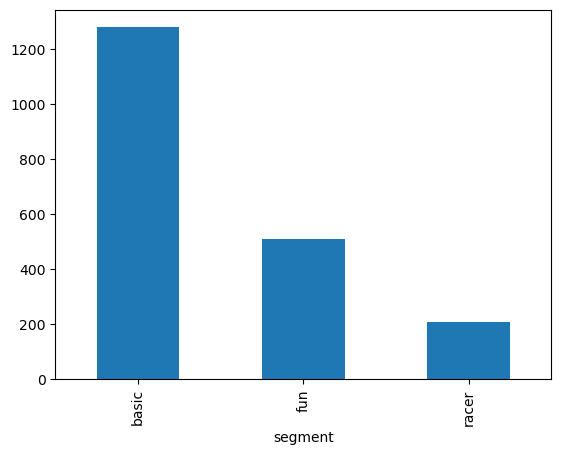

In [26]:
chosen_by_segment.loc[1].plot(kind="bar")
plt.show()

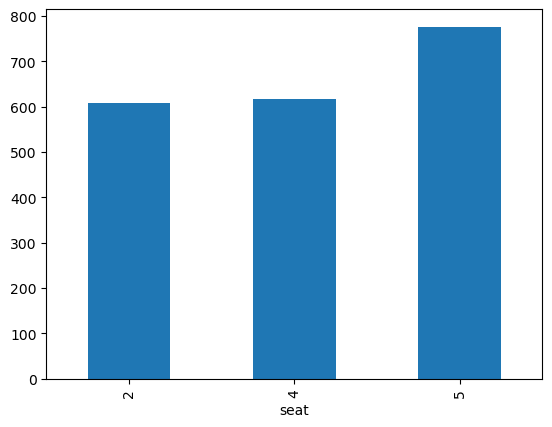

In [27]:
chosen_by_seat.loc[1].plot(kind="bar")
plt.show()

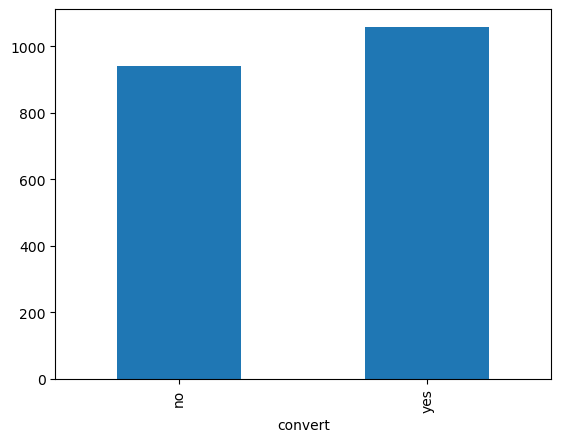

In [28]:
chosen_by_convert.loc[1].plot(kind="bar")
plt.show()

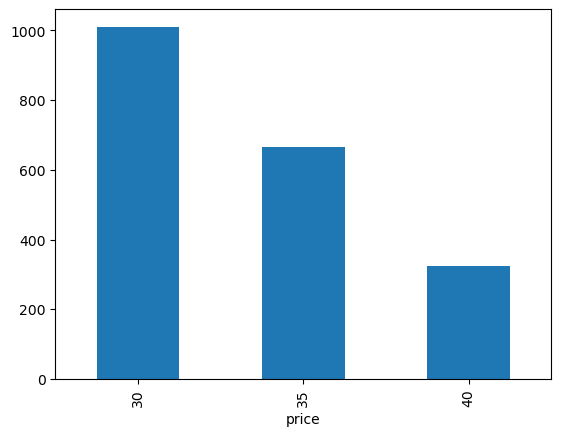

In [29]:
chosen_by_price.loc[1].plot(kind="bar")
plt.show()

## Profil

In [30]:
sportscar[
    sportscar.duplicated(
        subset=["segment", "trans", "seat", "convert", "price"],
        keep="first"
    )
].sort_values(["resp_id", "ques", "alt"])

,resp_id,ques,alt,segment,seat,trans,convert,price,choice
30,2,1,1,basic,5,manual,no,35,0
31,2,1,2,basic,5,manual,yes,35,0
32,2,1,3,basic,4,auto,yes,40,1
33,2,2,1,basic,4,manual,no,30,0
34,2,2,2,basic,2,auto,yes,35,0
...,...,...,...,...,...,...,...,...,...
5995,200,9,2,fun,2,auto,yes,35,0
5996,200,9,3,fun,4,manual,no,30,0
5997,200,10,1,fun,4,auto,yes,40,0
5998,200,10,2,fun,4,auto,no,30,1


In [31]:
sportscar[
    (sportscar.segment == "basic") & (sportscar.seat == 2)
    & (sportscar.trans == "auto") & (sportscar.convert == "no")
    & (sportscar.price == 30)
].sort_values("resp_id")

,resp_id,ques,alt,segment,seat,trans,convert,price,choice
17,1,6,3,basic,2,auto,no,30,1
49,2,7,2,basic,2,auto,no,30,1
77,3,6,3,basic,2,auto,no,30,1
90,4,1,1,basic,2,auto,no,30,0
133,5,5,2,basic,2,auto,no,30,1
...,...,...,...,...,...,...,...,...,...
5590,187,4,2,basic,2,auto,no,30,1
5674,190,2,2,basic,2,auto,no,30,0
5879,196,10,3,basic,2,auto,no,30,1
5901,197,8,1,basic,2,auto,no,30,1


In [32]:
sportscar[
    (sportscar.segment == "basic") & (sportscar.seat == 2)
    & (sportscar.trans == "auto") & (sportscar.convert == "no")
    & (sportscar.price == 30)
].choice.sum()

66

In [33]:
sportscar[sportscar.resp_id.isin([188])]

,resp_id,ques,alt,segment,seat,trans,convert,price,choice
5610,188,1,1,basic,4,auto,no,30,0
5611,188,1,2,basic,4,auto,no,35,1
5612,188,1,3,basic,4,manual,yes,35,0
5613,188,2,1,basic,4,manual,yes,40,0
5614,188,2,2,basic,5,auto,yes,35,1
5615,188,2,3,basic,4,auto,yes,35,0
5616,188,3,1,basic,5,auto,yes,30,1
5617,188,3,2,basic,2,manual,yes,40,0
5618,188,3,3,basic,2,auto,yes,40,0
5619,188,4,1,basic,2,manual,no,35,0


In [34]:
sportscar[
    (sportscar.segment == "fun") & (sportscar.seat == 2)
    & (sportscar.trans == "manual") & (sportscar.convert == "no")
    & (sportscar.price == 30)
].sort_values("resp_id")

,resp_id,ques,alt,segment,seat,trans,convert,price,choice
487,17,3,2,fun,2,manual,no,30,0
617,21,6,3,fun,2,manual,no,30,0
830,28,7,3,fun,2,manual,no,30,0
915,31,6,1,fun,2,manual,no,30,0
931,32,1,2,fun,2,manual,no,30,0
1257,42,10,1,fun,2,manual,no,30,0
1266,43,3,1,fun,2,manual,no,30,0
1357,46,3,2,fun,2,manual,no,30,1
1395,47,6,1,fun,2,manual,no,30,1
1474,50,2,2,fun,2,manual,no,30,0


In [35]:
sportscar[
    (sportscar.segment == "fun") & (sportscar.seat == 2)
    & (sportscar.trans == "manual") & (sportscar.convert == "no")
    & (sportscar.price == 30)
].shape

(45, 9)

In [36]:
sportscar[
    (sportscar.segment == "fun") & (sportscar.seat == 2)
    & (sportscar.trans == "manual") & (sportscar.convert == "no")
    & (sportscar.price == 30)
].choice.sum()

6

In [37]:
sportscar[
    (sportscar.segment == "basic") & (sportscar.seat == 5)
    & (sportscar.trans == "auto") & (sportscar.convert == "yes")
    & (sportscar.price == 30)
].sort_values("resp_id")

,resp_id,ques,alt,segment,seat,trans,convert,price,choice
83,3,8,3,basic,5,auto,yes,30,1
119,4,10,3,basic,5,auto,yes,30,0
131,5,4,3,basic,5,auto,yes,30,0
176,6,9,3,basic,5,auto,yes,30,1
208,7,10,2,basic,5,auto,yes,30,1
...,...,...,...,...,...,...,...,...,...
5847,195,10,1,basic,5,auto,yes,30,0
5868,196,7,1,basic,5,auto,yes,30,1
5880,197,1,1,basic,5,auto,yes,30,0
5931,198,8,1,basic,5,auto,yes,30,1


In [38]:
sportscar[
    (sportscar.segment == "basic") & (sportscar.seat == 5)
    & (sportscar.trans == "auto") & (sportscar.convert == "yes")
    & (sportscar.price == 30)
].choice.sum()

80

In [39]:
sportscar[
    (sportscar.resp_id == 4) & (sportscar.ques == 10)
]

,resp_id,ques,alt,segment,seat,trans,convert,price,choice
117,4,10,1,basic,5,manual,no,35,0
118,4,10,2,basic,5,auto,no,35,1
119,4,10,3,basic,5,auto,yes,30,0


In [40]:
sportscar[
    (sportscar.resp_id == 197) & (sportscar.ques == 1)
]

,resp_id,ques,alt,segment,seat,trans,convert,price,choice
5880,197,1,1,basic,5,auto,yes,30,0
5881,197,1,2,basic,5,manual,no,35,0
5882,197,1,3,basic,2,auto,yes,30,1


## Memeriksa Pilihan Responden

In [41]:
sportscar[sportscar.resp_id == 50]

,resp_id,ques,alt,segment,seat,trans,convert,price,choice
1470,50,1,1,fun,5,manual,yes,35,0
1471,50,1,2,fun,4,manual,yes,30,0
1472,50,1,3,fun,4,auto,yes,30,1
1473,50,2,1,fun,2,auto,no,35,0
1474,50,2,2,fun,2,manual,no,30,0
1475,50,2,3,fun,5,auto,yes,35,1
1476,50,3,1,fun,4,auto,no,35,0
1477,50,3,2,fun,2,auto,no,30,0
1478,50,3,3,fun,5,manual,yes,30,1
1479,50,4,1,fun,5,auto,no,40,1


In [42]:
resp_50 = sportscar[sportscar.resp_id == 50]
chosen_by_trans = pd.crosstab(resp_50.choice, resp_50.trans)
chosen_by_segment = pd.crosstab(resp_50.choice, resp_50.segment)
chosen_by_seat = pd.crosstab(resp_50.choice, resp_50.seat)
chosen_by_convert = pd.crosstab(resp_50.choice, resp_50.convert)
chosen_by_price = pd.crosstab(resp_50.choice, resp_50.price)

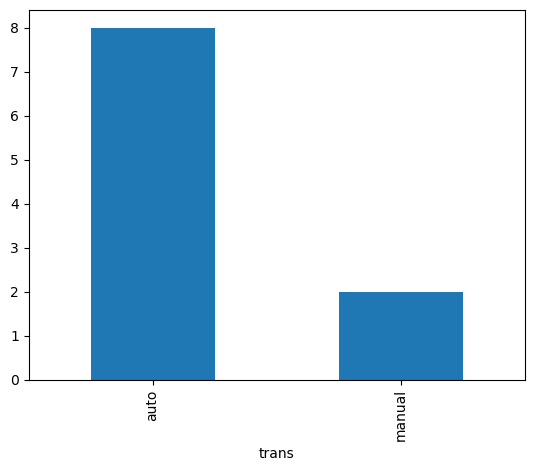

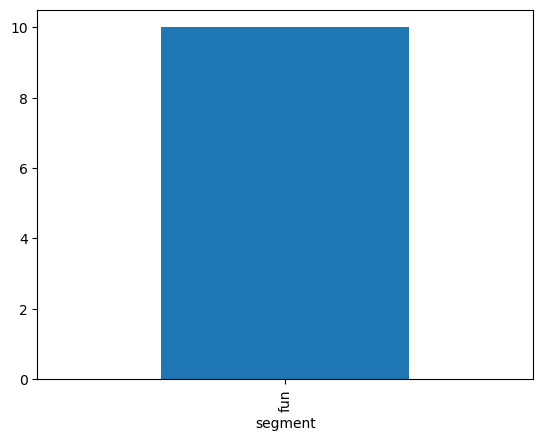

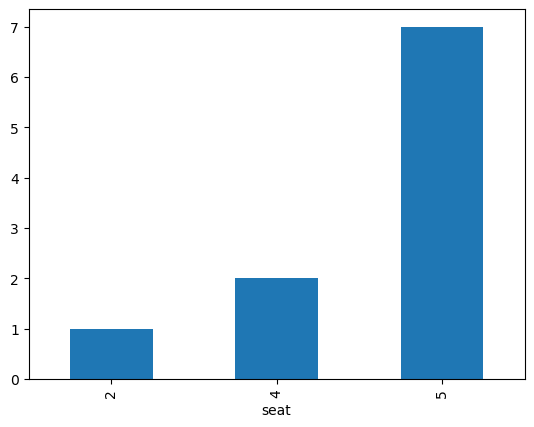

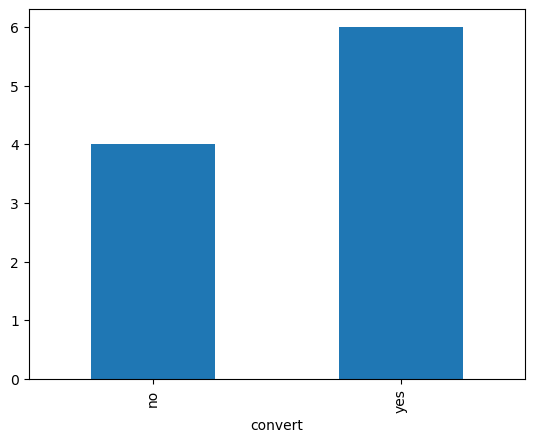

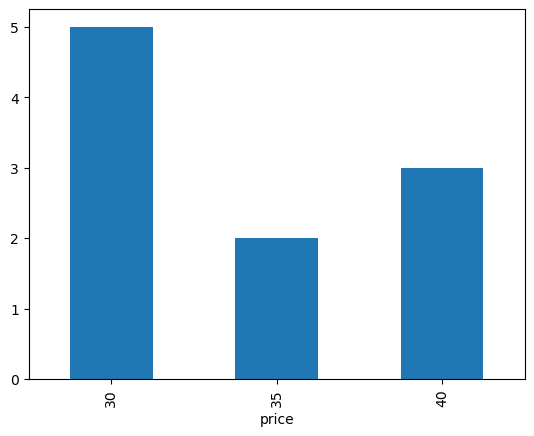

In [43]:
chosen_by_trans.loc[1].plot(kind="bar")
plt.show()
chosen_by_segment.loc[1].plot(kind="bar")
plt.show()
chosen_by_seat.loc[1].plot(kind="bar")
plt.show()
chosen_by_convert.loc[1].plot(kind="bar")
plt.show()
chosen_by_price.loc[1].plot(kind="bar")
plt.show()

In [44]:
resp_50[resp_50.price == 40]

,resp_id,ques,alt,segment,seat,trans,convert,price,choice
1479,50,4,1,fun,5,auto,no,40,1
1480,50,4,2,fun,5,manual,yes,40,0
1481,50,4,3,fun,4,manual,yes,40,0
1483,50,5,2,fun,2,manual,yes,40,1
1486,50,6,2,fun,4,manual,no,40,0
1488,50,7,1,fun,4,auto,no,40,0
1491,50,8,1,fun,5,auto,yes,40,1
1499,50,10,3,fun,2,manual,no,40,0


In [45]:
sportscar[sportscar.resp_id == 50].choice.sum()

10

In [46]:
sportscar.groupby("resp_id").agg({"choice": sum}).value_counts()

choice
10        200
dtype: int64

## One Hot Encoding

In [47]:
def generate_onehot(data, cat_cols=["segment", "trans", "convert"], encoder=None):
    """Generate one-hot data with OneHotEncoder for several columns
    and the compile them with the rest"""
    if not encoder:
        encoder = OneHotEncoder(sparse_output=False)
        onehot_data = encoder.fit_transform(data[cat_cols])
    else:
        onehot_data = encoder.transform(data[cat_cols])
    onehot_data = pd.DataFrame(
        onehot_data,
        columns=encoder.get_feature_names_out()
    )

    data = pd.concat([data, onehot_data], axis=1)
    data.drop(columns=cat_cols, inplace=True)

    return data, encoder

In [66]:
df_sportscar, encoder = generate_onehot(sportscar)

In [67]:
df_sportscar

,resp_id,ques,alt,seat,price,choice,segment_basic,segment_fun,segment_racer,trans_auto,trans_manual,convert_no,convert_yes
0,1,1,1,2,35,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,1,2,5,40,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1,1,3,5,30,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1,2,1,5,35,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1,2,2,2,30,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,200,9,2,2,35,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5996,200,9,3,4,30,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5997,200,10,1,4,40,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5998,200,10,2,4,30,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [50]:
sportscar

,resp_id,ques,alt,segment,seat,trans,convert,price,choice
0,1,1,1,basic,2,manual,yes,35,0
1,1,1,2,basic,5,auto,no,40,0
2,1,1,3,basic,5,auto,no,30,1
3,1,2,1,basic,5,manual,no,35,0
4,1,2,2,basic,2,manual,no,30,1
...,...,...,...,...,...,...,...,...,...
5995,200,9,2,fun,2,auto,yes,35,0
5996,200,9,3,fun,4,manual,no,30,0
5997,200,10,1,fun,4,auto,yes,40,0
5998,200,10,2,fun,4,auto,no,30,1


## Modeling

In [51]:
model = smf.mnlogit("choice ~ trans + convert + seat + price", sportscar).fit()

Optimization terminated successfully.
         Current function value: 0.559275
         Iterations 6


In [52]:
(dmatrices("choice ~ trans + convert + seat + price", sportscar, return_type="dataframe")[1])

,Intercept,trans[T.manual],convert[T.yes],seat,price
0,1.0,1.0,1.0,2.0,35.0
1,1.0,0.0,0.0,5.0,40.0
2,1.0,0.0,0.0,5.0,30.0
3,1.0,1.0,0.0,5.0,35.0
4,1.0,1.0,0.0,2.0,30.0
...,...,...,...,...,...
5995,1.0,0.0,1.0,2.0,35.0
5996,1.0,1.0,0.0,4.0,30.0
5997,1.0,0.0,1.0,4.0,40.0
5998,1.0,0.0,0.0,4.0,30.0


In [53]:
print(model.summary())

                          MNLogit Regression Results                          
Dep. Variable:                 choice   No. Observations:                 6000
Model:                        MNLogit   Df Residuals:                     5995
Method:                           MLE   Df Model:                            4
Date:                Wed, 06 Sep 2023   Pseudo R-squ.:                  0.1213
Time:                        23:29:29   Log-Likelihood:                -3355.6
converged:                       True   LL-Null:                       -3819.1
Covariance Type:            nonrobust   LLR p-value:                2.507e-199
       choice=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.2024      0.281     18.542      0.000       4.652       5.752
trans[T.manual]    -1.1155      0.061    -18.356      0.000      -1.235      -0.996
convert[T.yes]      0.1973      

### Interpretasi Parameter

Untuk penyederhanaan, atribut yang akan digunakan adalah `seat` dan `price`.

In [55]:
simple_model = smf.mnlogit("choice ~ seat + price", sportscar).fit()
print(simple_model.summary())

Optimization terminated successfully.
         Current function value: 0.589763
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                 choice   No. Observations:                 6000
Model:                        MNLogit   Df Residuals:                     5997
Method:                           MLE   Df Model:                            2
Date:                Wed, 06 Sep 2023   Pseudo R-squ.:                 0.07345
Time:                        23:31:31   Log-Likelihood:                -3538.6
converged:                       True   LL-Null:                       -3819.1
Covariance Type:            nonrobust   LLR p-value:                1.503e-122
  choice=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4603      0.264     16.871      0.000       3.942       4.979
seat           0.1241      0.

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                 choice   No. Observations:                 6000
Model:                        MNLogit   Df Residuals:                     5995
Method:                           MLE   Df Model:                            4
Date:                Wed, 06 Sep 2023   Pseudo R-squ.:                  0.1213
Time:                        23:31:42   Log-Likelihood:                -3355.6
converged:                       True   LL-Null:                       -3819.1
Covariance Type:            nonrobust   LLR p-value:                2.507e-199
===================================================================================
       choice=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.2024      0.281     18.542      0.000       4.652       5.752
trans[T.manual]    -1.1155      0.061    -18.356      0.000      -1.235      -0.996
convert[T.yes]      0.1973      0.059      3.320      0.001       0.081       0.314
seat                0.1287      0.024      5.356      0.000       0.082       0.176
price              -0.1726      0.008    -22.521      0.000      -0.188      -0.158
===================================================================================
"""

### Willingness to Pay 

In [57]:
model.params

,0
Intercept,5.202387
trans[T.manual],-1.115504
convert[T.yes],0.197295
seat,0.128717
price,-0.172622


In [58]:
model.params / -model.params.loc["price"]

,0
Intercept,30.137437
trans[T.manual],-6.462116
convert[T.yes],1.142930
seat,0.745656
price,-1.000000


### Partworth Utiliy

In [68]:
conjoint_attributes = ["seat", "trans", "convert", "price"]

In [70]:
levels = []
partworth = []
partworth_range = []

for atr in conjoint_attributes:
    num_levels = sportscar[atr].nunique()
    levels.append(sportscar[atr].unique().tolist())

    new_part_worth = model.params.loc[model.params.index.str.startswith(atr)].values.tolist()[0]
    new_part_worth.extend([-1 * sum(new_part_worth)])
    partworth_range.append(max(new_part_worth) - min(new_part_worth))
    partworth.append(new_part_worth)


partworth_attribute = []
for part in partworth_range:
    partworth_attribute.append(round(100 * (part / sum(partworth_range)), 2))

In [71]:
print("Part-worth Utility by Attribute:", partworth_attribute)

Part-worth Utility by Attribute: [7.97, 69.11, 12.22, 10.69]


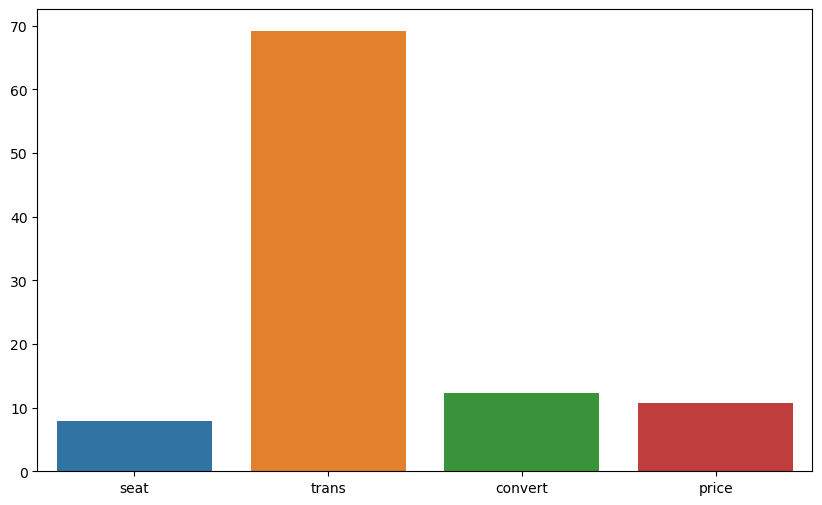

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x=conjoint_attributes, y=partworth_attribute)
plt.show()

## Predicting Shares

In [73]:
new_market = pd.DataFrame({
    "seat": [2, 2],
    "trans": ["manual", "auto"],
    "convert": ["no", "no"],
    "price": [35, 30]
})
new_market

,seat,trans,convert,price
0,2,manual,no,35
1,2,auto,no,30


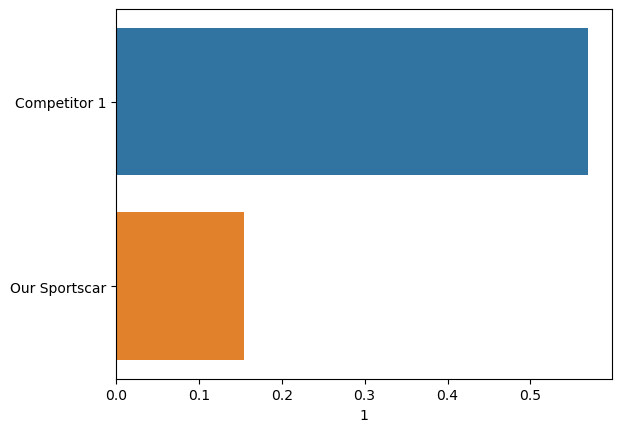

In [74]:
shares = model.predict(new_market)[1]
shares.index = ["Our Sportscar", "Competitor 1"]

sns.barplot(x=shares, y=shares.index, orient="h", order=["Competitor 1", "Our Sportscar"])
plt.show()